In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

tp.quiet()  # Turn off progress reports for best performance


In [2]:
@pims.pipeline
def gray(image):
    return image[:, :, 0]  # Take just the green channel

frames = gray(pims.open('frames/*.png'))

Detecting particles in one frame:

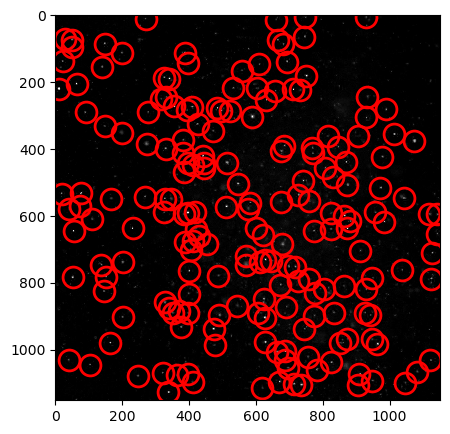

In [3]:
f = tp.locate(frames[0], 11, invert=False, minmass=700)
tp.annotate(f, frames[0]);

Detecting particles in all frames:

In [4]:
f = tp.batch(frames[:100000], 11, minmass=700, invert=False)
f.head(3)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,5.539611,928.364723,889.089996,2.304217,0.073847,47.178916,2288.0,0.002604,0
1,6.092576,747.799267,724.960528,2.194903,0.143945,39.869507,1687.0,0.003534,0
2,10.278276,269.981149,740.243839,1.977204,0.140426,51.165867,1461.0,0.004082,0


Linking particles in between frames (trajectories):

In [5]:
t = tp.link(f, 5, memory=3)
t.head(3)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,5.539611,928.364723,889.089996,2.304217,0.073847,47.178916,2288.0,0.002604,0,0
125,745.509730,137.556757,1229.309786,2.248483,0.181627,69.107145,2742.0,0.002172,0,1
126,747.915347,569.231425,1091.095496,3.255558,0.068394,22.592720,5699.0,0.001044,0,2


Ephemeral trajectories — seen only for a few frames — are usually spurious and never useful. The convenience function filter_stubs keeps only trajectories that last for a given number of frames.

In [6]:
t1 = tp.filter_stubs(t, 5)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())
t1.head(3)

Before: 18343
After: 4404


,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,5.539611,928.364723,889.089996,2.304217,0.073847,47.178916,2288.0,0.002604,0,0
0,745.509730,137.556757,1229.309786,2.248483,0.181627,69.107145,2742.0,0.002172,0,1
0,747.915347,569.231425,1091.095496,3.255558,0.068394,22.592720,5699.0,0.001044,0,2


Trajectory information of particle #2:

In [7]:
t1[t1.particle==2]

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,747.915347,569.231425,1091.095496,3.255558,0.068394,22.592720,5699.0,0.001044,0,2
1,748.032360,569.444797,1036.058677,3.201760,0.074531,23.666315,5270.0,0.001106,1,2
2,748.928685,573.589675,1197.039387,3.150390,0.113898,30.578973,5954.0,0.000906,2,2
3,748.606172,572.707508,1409.598724,3.071991,0.129046,34.412129,6544.0,0.000867,3,2
4,747.924742,573.099361,1325.697699,3.128106,0.032570,31.300290,6462.0,0.000871,4,2
...,...,...,...,...,...,...,...,...,...,...
75,749.577108,621.927479,1509.446101,3.156885,0.122181,37.587780,7651.0,0.000780,75,2
76,749.650352,622.987471,1682.317793,3.149561,0.189697,40.839351,8053.0,0.000712,76,2
77,749.837604,623.502261,1764.406083,3.038065,0.230206,51.855190,8237.0,0.000692,77,2


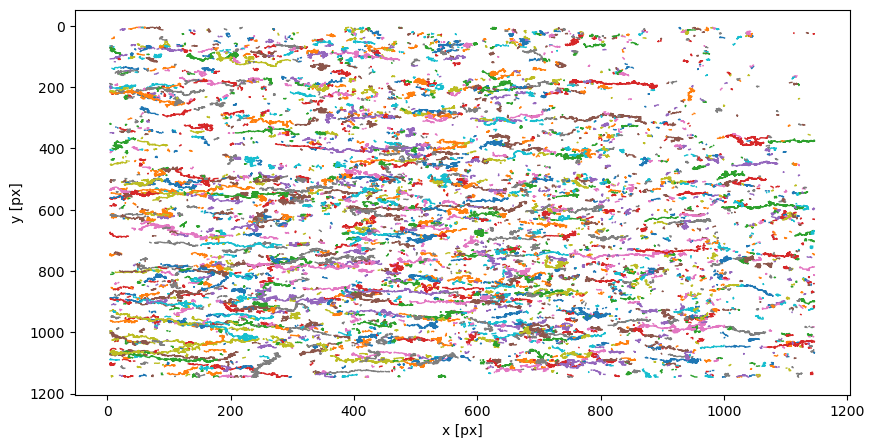

In [8]:
plt.figure()
tp.plot_traj(t1);

Compute the mean squared displacement (MSD) of each particle

In [9]:
im = tp.imsd(t1, 100/285., 50)  # microns per pixel = 100/285., frames per second = 50
im#[2]

,0,1,2,3,4,6,8,9,11,12,...,18283,18284,18288,18291,18292,18294,18295,18301,18305,18310
lag time [s],,,,,,,,,,,,,,,,,,,,,
0.02,0.192519,0.486189,0.422867,0.335946,0.190001,0.181470,0.289129,0.174695,0.475073,0.008589,...,0.508591,0.115471,0.224976,0.168785,0.196296,0.767047,0.062018,0.181488,0.193475,0.096186
0.04,0.481315,1.184175,0.847728,0.394066,0.454585,0.428638,0.705529,0.469892,1.145651,0.011989,...,1.306763,0.390703,0.420165,0.487636,0.473093,1.320975,0.090252,0.409316,0.449078,0.208643
0.06,0.862650,1.849664,1.189829,0.871641,0.734123,0.672124,1.193171,0.812198,1.628622,0.014773,...,1.889002,0.788288,0.823214,0.869671,1.034794,2.308903,0.161653,0.505268,0.751982,0.170831
0.08,1.247910,2.461325,1.740180,2.019331,1.020823,0.889147,1.745338,1.197495,1.895659,0.014736,...,2.841476,1.319689,0.952753,1.298115,1.449947,3.407291,0.394657,0.855201,0.968348,0.006255
0.10,1.475752,2.897340,2.331408,4.462048,1.326238,1.093498,2.290758,1.658911,1.944890,0.016988,...,3.467159,1.921518,1.747489,1.636311,1.126732,NaN,0.602527,1.637768,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.92,NaN,NaN,NaN,NaN,32.069103,16.969859,132.157868,259.265445,NaN,0.020944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.94,NaN,NaN,NaN,NaN,32.184749,17.054277,133.387804,263.138215,NaN,0.021816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.96,NaN,NaN,NaN,NaN,32.321491,17.103753,134.315110,267.048962,NaN,0.023860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
t1 = t1.rename_axis('index')
raw_masses = t1.groupby('particle').agg({'raw_mass': 'mean'})
raw_masses

,raw_mass
particle,
0,2349.750000
1,2304.773585
2,6450.192308
3,3271.000000
4,4079.320175
...,...
18294,2675.600000
18295,1906.000000
18301,1715.857143


In [43]:
raw_masses.index

Index([    0,     1,     2,     3,     4,     6,     8,     9,    11,    12,
       ...
       18283, 18284, 18288, 18291, 18292, 18294, 18295, 18301, 18305, 18310],
      dtype='int64', name='particle', length=4404)

In [58]:
msd = []
mass = []
lag_time = 1.00
for i in im.columns:
    msd_i = im.loc[lag_time][i]
    raw_mass_i = raw_masses.loc[i][0]
    if not np.isnan(msd_i) and not np.isnan(raw_mass_i) and i in raw_masses.index and msd_i>0:
        #print(i, msd_i)
        #print(raw_mass_i)
        msd.append(msd_i)
        mass.append(raw_mass_i)
        

Text(0, 0.5, 'MSD')

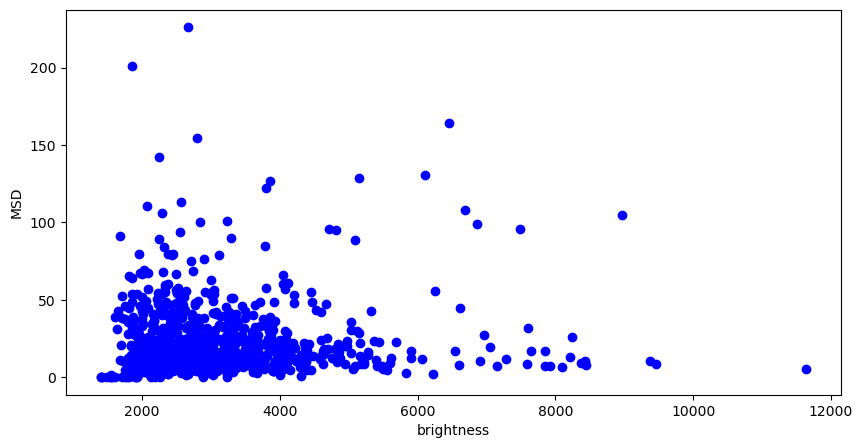

In [59]:
plt.scatter(mass, msd, label='Scatter Plot', color='blue', marker='o')
plt.xlabel('brightness')
plt.ylabel('MSD')

In [75]:
result = [a / b for a, b in zip(mass, msd)]
result = np.log(result)

In [76]:
max(result)

14.36720164372552

(array([ 1.,  0.,  1.,  0.,  1.,  3.,  0.,  2.,  3., 12.,  5., 14., 13.,
        21., 18., 32., 20., 40., 30., 28., 36., 37., 40., 39., 31., 27.,
        35., 40., 36., 30., 30., 18., 19., 18., 15., 14., 10., 15., 11.,
         9.,  2.,  3.,  3.,  0.,  3.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
         2.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([ 2.21982789,  2.34130163,  2.46277537,  2.58424911,  2.70572284,
         2.82719658,  2.94867032,  3.07014406,  3.19161779,  3.31309153,
         3.43456527,  3.55603901,  3.67751274,  3.79898648,  3.92046022,
         4.04193396,  4.16340769,  4.28488143,  4.40635517,  4.52782891,
         4.64930264,  4.77077638,  4.89225012,  5.01372386,  5.13519759,
         5.25667133,  5.37814507,  5.49961881,  5.62109254,  5.742566

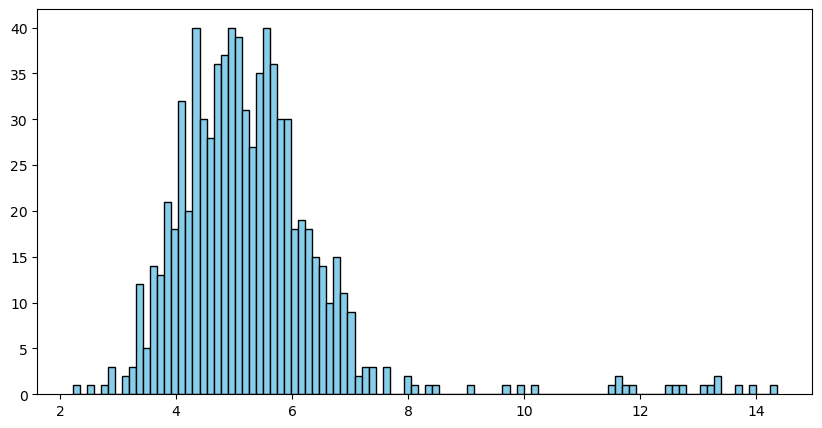

In [77]:
plt.hist(result, bins=100, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed